In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

## Describing distributions

We have seen several examples of *distributions*.

We can describe distributions as having a *center*, and a *spread*.

In [the mean as predictor](mean_meaning), we saw that the mean is
a useful measure of the center of a distribution.

What measure should we use for the spread?

## Back to chronic kidney disease

We return to the [data on chronic kidney disease]({{ site.baseurl
}}/data/chronic_kidney_disease).

Download the data to your computer via this link: [ckd_clean.csv]({{
site.baseurl }}/data/ckd_clean.csv).

In [2]:
ckd_full = pd.read_csv('ckd_clean.csv')
ckd_full.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,1


We will use this dataset to get a couple of variables (columns) and
therefore a couple of distributions.

Let's start with the White Blood Cell Count, usually abbreviated as WBC.

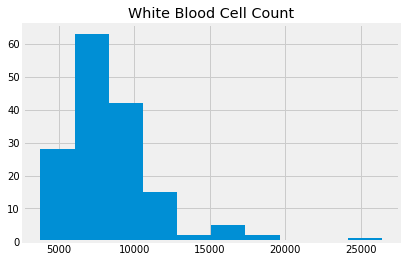

In [3]:
wbc = ckd_full['White Blood Cell Count']
wbc.hist()
plt.title('White Blood Cell Count');

In [4]:
wbc.describe()

count      158.000000
mean      8475.949367
std       3126.880181
min       3800.000000
25%       6525.000000
50%       7800.000000
75%       9775.000000
max      26400.000000
Name: White Blood Cell Count, dtype: float64

Compare this to Hemoglobin concentrations:

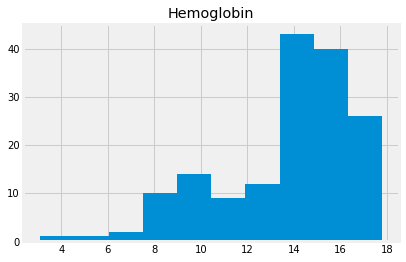

In [5]:
hgb = ckd_full['Hemoglobin']
hgb.hist()
plt.title('Hemoglobin');

In [6]:
hgb.describe()

count    158.000000
mean      13.687342
std        2.882204
min        3.100000
25%       12.600000
50%       14.250000
75%       15.775000
max       17.800000
Name: Hemoglobin, dtype: float64

Notice that we can't easily plot these two on the same axes, because
their units are so different.

Here's what that looks like.  Notice that the hemoglobin values disappear in a tiny spike to the left.

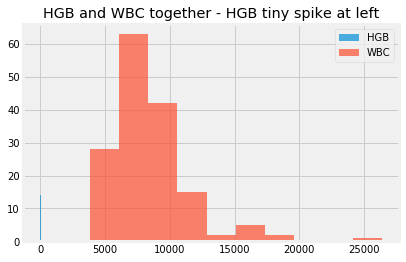

In [7]:
# Use alpha to make the histograms a little transparent.
# Label them for a legend.
hgb.hist(alpha=0.7, label='HGB')
wbc.hist(alpha=0.7, label='WBC')
plt.title("HGB and WBC together - HGB tiny spike at left")
plt.legend();

We could try and fix this by subtracting the mean, as a center value, so
the values are now *deviations* from the mean.

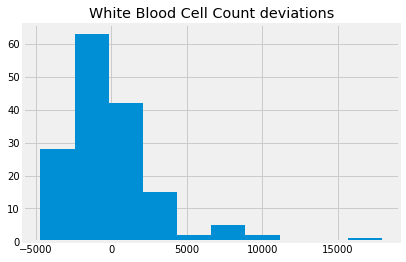

In [8]:
wbc_deviations = wbc - np.mean(wbc)
wbc_deviations.hist()
plt.title('White Blood Cell Count deviations');

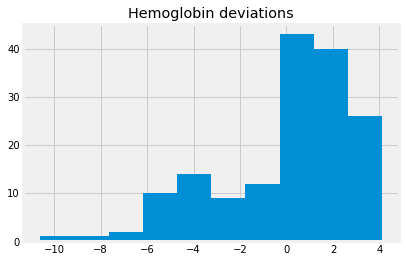

In [9]:
hgb_deviations = hgb - np.mean(hgb)
hgb_deviations.hist()
plt.title('Hemoglobin deviations');

The deviations each have a mean very very close to zero, and therefore,
they have the same center:

In [10]:
np.mean(wbc_deviations), np.mean(hgb_deviations)

(-1.8420145858692217e-13, 7.195369476051647e-16)

We still cannot sensibly plot them on the same axes, because the WBC values have
a very different *spread*.  The WBC values completely dominate the x axis of
the graph.  We can't reasonably compare the WBC deviations to the
Hemoglobin deviations, because they have such different *units*.

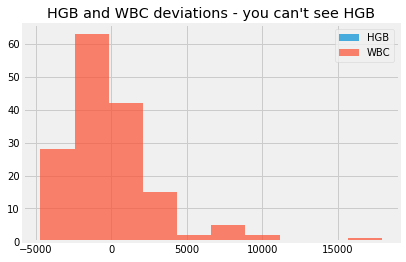

In [11]:
hgb_deviations.hist(alpha=0.7, label='HGB')
wbc_deviations.hist(alpha=0.7, label='WBC')
plt.title("HGB and WBC deviations - you can't see HGB")
plt.legend();

We would like a measure of the spread of the distribution, so we can set
the two distributions to have the same spread.


## The standard deviation

In the [mean as predictor](mean_meaning) section, we found that mean was
the best value to use as a predictor, to minimize the sum of *squared*
deviations.

Maybe we could get an idea of the typical *squared* deviation, as
a measure of spread?

In [12]:
hgb_deviations[:10]

0   -2.487342
1   -4.187342
2   -2.887342
3   -8.087342
4   -5.987342
5   -3.887342
6   -1.187342
7   -3.687342
8   -3.187342
9   -3.887342
Name: Hemoglobin, dtype: float64

In [13]:
hgb_dev_sq = hgb_deviations ** 2
hgb_dev_sq[:10]

0     6.186869
1    17.533831
2     8.336743
3    65.405097
4    35.848261
5    15.111426
6     1.409780
7    13.596489
8    10.159148
9    15.111426
Name: Hemoglobin, dtype: float64

Text(0.5, 1.0, 'HGB squared deviations')

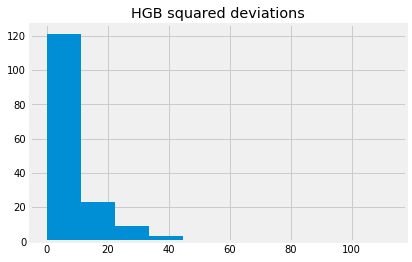

In [14]:
hgb_dev_sq.hist()
plt.title('HGB squared deviations')

The center, or typical value, of this distribution, could be the *mean*.

In [15]:
hgb_dev_sq_mean = np.mean(hgb_dev_sq)
hgb_dev_sq_mean

8.254523313571543

This is the *mean squared deviation*.  This is also called the
*variance*.  Numpy has a function to calculate that in one shot:

In [16]:
# The mean squared deviation is the variance
np.var(hgb)

8.254523313571543

The mean squared deviation is a good indicator of the typical squared
deviation.  What should we use for some measure of the typical
deviation?

We could take the square root of the mean squared deviation, like this:

In [17]:
np.sqrt(hgb_dev_sq_mean)

2.873068623192203

This is a measure of the spread of the distribution.  It is a measure of
the typical or average deviation.

It is also called the *standard deviation*.

In [18]:
np.std(hgb)

2.873068623192203

We can make our distribution have a standard center *and* a standard
spread by dividing our mean-centered distribution, by the standard
deviation.  Then the distribution will have a standard deviation very
close to 1.

This version of the distribution, with mean 0 and standard deviation of
1, is called the *standardized* distribution.

Text(0.5, 1.0, 'Standardized Hemoglobin')

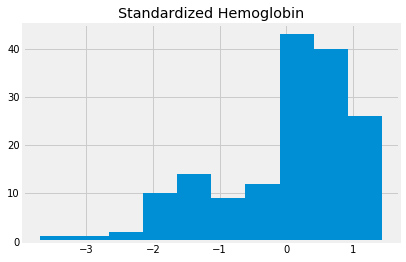

In [19]:
standardized_hgb = hgb_deviations / np.std(hgb)
standardized_hgb.hist()
plt.title('Standardized Hemoglobin')

We can make a function to do this:

In [20]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

Text(0.5, 1.0, 'Standardized Hemoglobin, again')

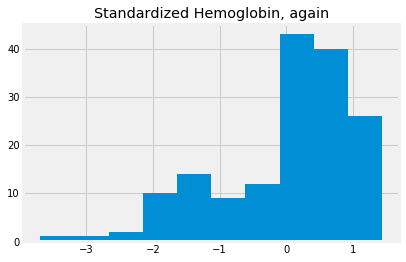

In [21]:
std_hgb_again = standard_units(hgb)
std_hgb_again.hist()
plt.title('Standardized Hemoglobin, again')

If we do the same to the WBC, we can compare values of the
distributions:

Text(0.5, 1.0, 'Standardized White Blood Cell Count')

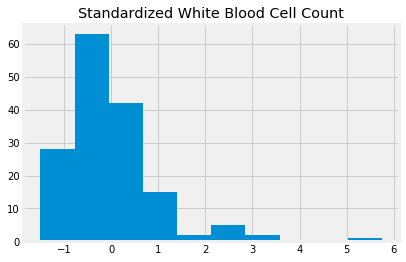

In [22]:
std_wbc = standard_units(wbc)
std_wbc.hist()
plt.title('Standardized White Blood Cell Count')

Now we can put both these distributions on the same graph, to compare them directly.

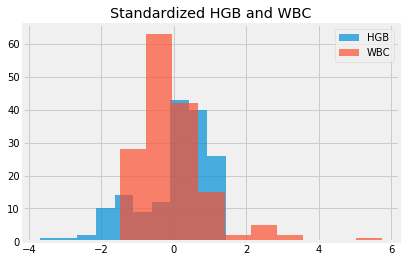

In [23]:
std_hgb_again.hist(alpha=0.7, label='HGB')
std_wbc.hist(alpha=0.7, label='WBC')
plt.title('Standardized HGB and WBC')
plt.legend()

Every value in standardized units gives the deviation of the original
value from its mean, in terms of the number of standard deviations.